In [1]:
# Standard magic
from ase import Atoms
from gpaw import GPAW

# Beryllium atom
atoms = Atoms(symbols='Be',
              positions=[(0, 0, 0)],
              pbc=False)

# Add 6.0 ang vacuum around the atom
atoms.center(vacuum=6.0)

# Create GPAW calculator
calc = GPAW(nbands=1, h=0.3)
# Attach calculator to atoms
atoms.set_calculator(calc)

# Calculate the ground state
energy = atoms.get_potential_energy()

# Save the ground state
calc.write('be_gs.gpw', 'all')



  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  1.4.0
 |___|_|             

User:   tmh@tmh-desktop.sciomnis.com
Date:   Sun Apr 28 19:35:50 2019
Arch:   x86_64
Pid:    6271
Python: 3.6.5
gpaw:   /usr/lib64/python3.6/site-packages/gpaw
_gpaw:  /usr/lib64/python3.6/site-packages/
        _gpaw.cpython-36m-x86_64-linux-gnu.so
ase:    /usr/lib/python3.6/site-packages/ase (version 3.17.0)
numpy:  /usr/lib64/python3.6/site-packages/numpy (version 1.16.2)
scipy:  /usr/lib64/python3.6/site-packages/scipy (version 1.2.1)
units:  Angstrom and eV
cores:  1

Input parameters:
  h: 0.3
  nbands: 1

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

Be-setup:
  name: Beryllium
  id: d77e40d38d1f53bdfb08303a2a5dc666
  Z: 4
  valence: 2
  core: 2
  charge: 0.0
  file: /home/tmh/StudyGit/gpaw-data/gpaw-setups-0.9.20000/Be.LDA.gz
  cutoffs: 0.79(comp), 1.42(filt), 1.84(core), lmax=2
  valence states:
              

In [2]:
from gpaw.tddft import *

time_step = 8.0                  # 1 attoseconds = 0.041341 autime
iterations = 2500                # 2500 x 8 as => 20 fs
kick_strength = [0.0,0.0,1e-3]   # Kick to z-direction

# Read ground state
td_calc = TDDFT('be_gs.gpw')

# Kick with a delta pulse to z-direction
td_calc.absorption_kick(kick_strength=kick_strength)

# Propagate, save the time-dependent dipole moment to 'be_dm.dat',
# and use 'be_td.gpw' as restart file
td_calc.propagate(time_step, iterations, 'be_dm.dat', 'be_td.gpw')

# Calculate photoabsorption spectrum and write it to 'be_spectrum_z.dat'
photoabsorption_spectrum('be_dm.dat', 'be_spectrum_z.dat')


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  1.4.0
 |___|_|             

User:   tmh@tmh-desktop.sciomnis.com
Date:   Sun Apr 28 19:36:23 2019
Arch:   x86_64
Pid:    6271
Python: 3.6.5
gpaw:   /usr/lib64/python3.6/site-packages/gpaw
_gpaw:  /usr/lib64/python3.6/site-packages/
        _gpaw.cpython-36m-x86_64-linux-gnu.so
ase:    /usr/lib/python3.6/site-packages/ase (version 3.17.0)
numpy:  /usr/lib64/python3.6/site-packages/numpy (version 1.16.2)
scipy:  /usr/lib64/python3.6/site-packages/scipy (version 1.2.1)
units:  Angstrom and eV
cores:  1

Reading from be_gs.gpw
Read dipole, energy, free_energy
Reading input parameters:
  h: 0.3
  nbands: 1

Initialize ...

Be-setup:
  name: Beryllium
  id: d77e40d38d1f53bdfb08303a2a5dc666
  Z: 4
  valence: 2
  core: 2
  charge: 0.0
  file: /home/tmh/StudyGit/gpaw-data/gpaw-setups-0.9.20000/Be.LDA.gz
  cutoffs: 0.79(comp), 1.42(filt), 1.84(core), lmax=2
  valence states:
                energy  radius
 

iter: 440  19:44:43     3520.00        0.006552     -15.0         29
iter: 450  19:44:55     3600.00        0.006552     -15.0         29
iter: 460  19:45:07     3680.00        0.006552     -15.9         29
iter: 470  19:45:20     3760.00        0.006552     -15.2         29
iter: 480  19:45:34     3840.00        0.006552     -15.6         29
iter: 490  19:45:47     3920.00        0.006552     -15.8         28
Writing to be_td.gpw (mode='all')

Wrote restart file.
500  iterations done. Current time is  4000.0000000000064  as.
iter: 500  19:46:00     4000.00        0.006552     -15.3         29
iter: 510  19:46:12     4080.00        0.006552     -15.9         28
iter: 520  19:46:25     4160.00        0.006552     -15.4         28
iter: 530  19:46:37     4240.00        0.006552     -15.3         28
iter: 540  19:46:49     4320.00        0.006552     -15.0         29
iter: 550  19:47:01     4400.00        0.006552     -15.5         28
iter: 560  19:47:14     4480.00        0.006552     -1

iter: 1460  20:04:20    11680.00        0.006552     -14.9         29
iter: 1470  20:04:30    11760.00        0.006552     -15.3         28
iter: 1480  20:04:41    11840.00        0.006552     -15.2         29
iter: 1490  20:04:53    11920.00        0.006552     -15.4         29
Writing to be_td.gpw (mode='all')

Wrote restart file.
1500  iterations done. Current time is  11999.999999999818  as.
iter: 1500  20:05:05    12000.00        0.006552     -15.3         28
iter: 1510  20:05:16    12080.00        0.006552     -15.1         29
iter: 1520  20:05:27    12160.00        0.006552     -15.2         29
iter: 1530  20:05:38    12240.00        0.006552     -15.4         29
iter: 1540  20:05:49    12320.00        0.006552     -15.0         29
iter: 1550  20:06:00    12400.00        0.006552     -15.3         28
iter: 1560  20:06:12    12480.00        0.006552     -15.1         28
iter: 1570  20:06:23    12560.00        0.006552     -15.2         29
iter: 1580  20:06:34    12640.00        0

iter: 2470  20:23:02    19760.00        0.006552     -15.8         29
iter: 2480  20:23:13    19840.00        0.006552     -15.0         29
iter: 2490  20:23:25    19920.00        0.006552     -15.4         28
Writing to be_td.gpw (mode='all')

Wrote restart file.
2500  iterations done. Current time is  20000.00000000094  as.
Writing to be_td.gpw (mode='all')

Calculating photoabsorption spectrum from file "be_dm.dat"
Sinc contamination 0.00000000
Calculated photoabsorption spectrum saved to file "be_spectrum_z.dat"


In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
be_spec=np.loadtxt("be_spectrum_z.dat")

<IPython.core.display.Javascript object>


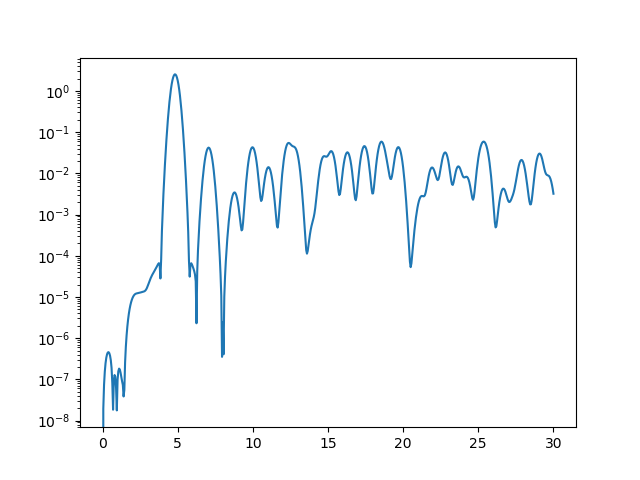

In [13]:
%matplotlib notebook
plt.semilogy(be_spec[:,0],np.abs(be_spec[:,3]))

In [16]:
# Creates: atomization.txt
from __future__ import print_function

from ase import Atoms, Atom
from ase.parallel import paropen as open
from gpaw import GPAW, PW, FermiDirac

a = 10.  # Size of unit cell (Angstrom)
c = a / 2

# Hydrogen atom:
atom = Atoms('H',
             positions=[(c, c, c)],
             magmoms=[0],
             cell=(a, a + 0.0001, a + 0.0002))  # Break cell symmetry

# gpaw calculator:
calc = GPAW(mode=PW(), 
            xc='PBE', 
            hund=True, 
            eigensolver='rmm-diis',  # This solver can parallelize over bands
            occupations=FermiDirac(0.0, fixmagmom=True), 
            txt='H.out',
            )
atom.set_calculator(calc)

e1 = atom.get_potential_energy()
calc.write('H.gpw')

# Hydrogen molecule:
d = 0.74  # Experimental bond length
molecule = Atoms('H2',
                 positions=([c - d / 2, c, c],
                            [c + d / 2, c, c]),
                 cell=(a, a, a))

calc.set(txt='H2.out')
calc.set(hund=False)  # No hund rule for molecules

molecule.set_calculator(calc)
e2 = molecule.get_potential_energy()
calc.write('H2.gpw')

fd = open('atomization.txt', 'w')
print('  hydrogen atom energy:     %5.2f eV' % e1, file=fd)
print('  hydrogen molecule energy: %5.2f eV' % e2, file=fd)
print('  atomization energy:       %5.2f eV' % (2 * e1 - e2), file=fd)
fd.close()

In [15]:
e1

-1.070478223494053

In [45]:
from math import cos, sin, pi

from ase import Atoms
from ase.optimize import QuasiNewton
from ase.vibrations import Vibrations

from gpaw import GPAW

# Water molecule:
d = 0.9575
t = pi / 180 * 104.51

H2O = Atoms('H2O',
            positions=[(d, 0, 0),
                       (d * cos(t), d * sin(t), 0),
                       (0, 0, 0)])

H2O.center(vacuum=3.5)

calcw = GPAW(h=0.2, txt='h2o.txt', mode='lcao', basis='dzp')

H2O.set_calculator(calcw)

QuasiNewton(H2O).run(fmax=0.05)


                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 15:37:26      -13.677099*       1.6318
BFGSLineSearch:    1[  2] 15:37:44      -13.712412*       0.1678
BFGSLineSearch:    2[  4] 15:37:52      -13.712788*       0.1284
BFGSLineSearch:    3[  6] 15:38:04      -13.712957*       0.0344


True

In [46]:
"""Calculate the vibrational modes of a H2O molecule."""

# Create vibration calculator
vib = Vibrations(H2O)
vib.run()
vib.summary(method='frederiksen')

# Make trajectory files to visualize normal modes:
for mode in range(9):
    vib.write_mode(mode)

---------------------
  #    meV     cm^-1
---------------------
  0   52.0i    419.8i
  1   41.7i    336.0i
  2   22.7i    182.7i
  3    0.8i      6.4i
  4    5.7      45.9 
  5    9.3      74.7 
  6  186.6    1505.3 
  7  450.8    3636.0 
  8  465.1    3751.5 
---------------------
Zero-point energy: 0.559 eV


In [47]:
irw = Infrared(H2O)
irw.run()
irw.summary()

-------------------------------------
 Mode    Frequency        Intensity
  #    meV     cm^-1   (D/Å)^2 amu^-1
-------------------------------------
  0   24.6i    198.2i     0.0008
  1   17.0     137.1      0.0020
  2   19.6     158.3      0.0046
  3   55.1     444.5      0.0634
  4   62.7     506.0      0.0799
  5  242.6    1957.0      5.6843
  6  244.9    1975.4      5.6077
  7  422.2    3405.5      1.4176
  8 1005.4    8109.0    134.4229
-------------------------------------
Zero-point energy: 1.035 eV
Static dipole moment: 0.000 D
Maximum force on atom in `equilibrium`: 0.0131 eV/Å



In [48]:
from math import cos, sin, pi

from ase import Atoms
from ase.optimize import QuasiNewton
from ase.vibrations import Vibrations
from ase.vibrations import Infrared

from gpaw import GPAW

# CO2 molecule:
d = 1.163

CO2 = Atoms('CO2',
            positions=[(0, 0, 0),
                       (d, 0, 0),
                       (-d, 0, 0)])

CO2.center(vacuum=3.5)

calcc = GPAW(h=0.2, txt='co2.txt', mode='lcao', basis='dzp')

CO2.set_calculator(calcc)

QuasiNewton(CO2).run(fmax=0.05)
#
#
#"""Calculate the vibrational modes of a CO2 molecule."""
#
## Create vibration calculator
#vib = Vibrations(CO2)
#vib.run()
#vib.summary(method='frederiksen')
#
## Make trajectory files to visualize normal modes:
#for mode in range(9):
#    vib.write_mode(mode)

                Step[ FC]     Time          Energy          fmax
*Force-consistent energies used in optimization.
BFGSLineSearch:    0[  0] 15:39:56      -22.893884*       1.9072
BFGSLineSearch:    1[  2] 15:40:17      -22.924799*       0.1217
BFGSLineSearch:    2[  3] 15:40:20      -22.925064*       0.0131


True

In [49]:
"""Calculate the vibrational modes of a CO2 molecule."""

# Create vibration calculator
vibc = Vibrations(CO2)
vibc.run()
vibc.summary(method='frederiksen')

# Make trajectory files to visualize normal modes:
for mode in range(9):
    vibc.write_mode(mode)

---------------------
  #    meV     cm^-1
---------------------
  0   14.1i    113.4i
  1   11.4i     92.3i
  2    7.1i     57.3i
  3    0.5i      4.1i
  4    4.8      38.6 
  5    6.7      54.1 
  6   63.1     509.3 
  7  150.5    1213.6 
  8  175.4    1414.6 
---------------------
Zero-point energy: 0.200 eV


In [50]:
irc = Infrared(CO2)
irc.run()
irc.summary()

-------------------------------------
 Mode    Frequency        Intensity
  #    meV     cm^-1   (D/Å)^2 amu^-1
-------------------------------------
  0   15.4i    124.5i     0.0001
  1   13.9     112.4      0.0056
  2   14.9     119.9      0.0067
  3   15.8     127.5      0.0011
  4   20.2     162.8      0.0003
  5   74.2     598.1      0.5174
  6   74.8     603.5      0.5108
  7  163.6    1319.4      0.0000
  8  296.8    2393.8     12.3891
-------------------------------------
Zero-point energy: 0.337 eV
Static dipole moment: 0.000 D
Maximum force on atom in `equilibrium`: 0.0131 eV/Å

